In [4]:
import pandas as pd
import numpy as np
import keras
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import GRU
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import RepeatVector
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from matplotlib import pyplot as plt
from itertools import chain

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/scalation/data/master/COVID/CLEANED_35.csv')
date = df['date'].tail(362-42)
deaths = df['deathIncrease'].tail(362-42)
sequence=array(deaths)

In [6]:
def split_sequence(data,steps_in,steps_out):
    X,y=list(),list()
    for i in range(len(data)):
        seq_end=i+steps_in
        end_out=seq_end+steps_out
        if end_out > len(data):
            break
        seq_x, seq_y=data[i:seq_end], data[seq_end:end_out]
        X.append(seq_x)
        y.append(seq_y)
    return array(X),array(y)

In [7]:
steps_in, steps_out = 21 , 14
X, y=split_sequence(sequence,steps_in,steps_out)

In [8]:
Xa=sequence
Xa=Xa.reshape(Xa.shape[0],1)
print(Xa.shape)
print(X.shape, y.shape)

(320, 1)
(286, 21) (286, 14)


In [23]:
#Tuned model using keras tuner
model=Sequential()
model.add(Dense(160,activation='relu',input_shape=(21,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(steps_out))
model.compile(optimizer='adam',loss='mape')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 160)               3520      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                5152      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_16 (Dense)             (None, 14)                910       
Total params: 11,694
Trainable params: 11,694
Non-trainable params: 0
_________________________________________________________________


m = 286, tr_size = 171, te_size = 115, kt = 115, h = 10
(115, 21) (115, 14) (171, 21) (171, 14)
we are in loop


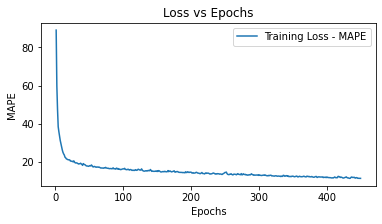

Min Training Loss = 11.37366008758545 at Epoch 448
15.872027519007917
h=1  ->  smape= 15.87
18.008713974971396
h=2  ->  smape= 18.01
18.135771239468525
h=3  ->  smape= 18.14
18.898396881105256
h=4  ->  smape= 18.90
19.698378441280816
h=5  ->  smape= 19.70
18.71799136853632
h=6  ->  smape= 18.72
22.27835396385569
h=7  ->  smape= 22.28
23.984195834251818
h=8  ->  smape= 23.98
22.930809475909268
h=9  ->  smape= 22.93
23.985898522501614
h=10 ->  smape= 23.99
25.454424812548545
h=11  ->  smape= 25.45
26.00672607931844
h=12  ->  smape= 26.01
26.690739506853323
h=13  ->  smape= 26.69
27.78971361196378
h=14  ->  smape= 27.79
rSq =['0.8901', '0.8388', '0.8185', '0.8120', '0.7998', '0.8170', '0.7881', '0.7546', '0.7086', '0.7050', '0.6148', '0.6296', '0.6680', '0.6106'] mape =['15.49', '17.80', '18.27', '18.66', '19.69', '18.79', '21.36', '22.67', '22.12', '22.93', '23.81', '24.14', '24.00', '25.30'] smape =['15.87', '18.01', '18.14', '18.90', '19.70', '18.72', '22.28', '23.98', '22.93', '23.99'

In [24]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(model, True, X, y, -1, 10, 0, 450, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [29]:
#model before tuning
amodel=Sequential()
amodel.add(Dense(100,activation='relu',input_shape=(21,)))
amodel.add(Dense(50,activation='relu'))
amodel.add(Dense(50,activation='relu'))
amodel.add(Dense(steps_out))
amodel.compile(optimizer='adam',loss='mape')
amodel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 100)               2200      
_________________________________________________________________
dense_26 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_27 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_28 (Dense)             (None, 14)                714       
Total params: 10,514
Trainable params: 10,514
Non-trainable params: 0
_________________________________________________________________


m = 286, tr_size = 171, te_size = 115, kt = 115, h = 10
(115, 21) (115, 14) (171, 21) (171, 14)
we are in loop


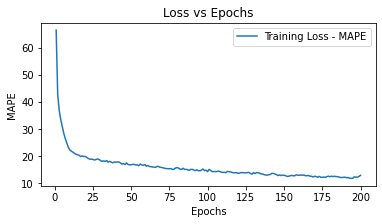

Min Training Loss = 11.81835651397705 at Epoch 194
20.99768081526184
h=1  ->  smape= 21.00
18.238676046381656
h=2  ->  smape= 18.24
21.04156708179014
h=3  ->  smape= 21.04
20.224846209096984
h=4  ->  smape= 20.22
19.733770257914404
h=5  ->  smape= 19.73
19.584246791044833
h=6  ->  smape= 19.58
24.98873675699679
h=7  ->  smape= 24.99
23.10472173422411
h=8  ->  smape= 23.10
25.169702335425075
h=9  ->  smape= 25.17
27.736766512113224
h=10 ->  smape= 27.74
29.325252293349365
h=11  ->  smape= 29.33
30.935623425944595
h=12  ->  smape= 30.94
27.85368800688839
h=13  ->  smape= 27.85
26.096157339911013
h=14  ->  smape= 26.10
rSq =['0.8737', '0.8503', '0.8169', '0.8032', '0.8187', '0.8150', '0.7682', '0.7618', '0.7063', '0.6620', '0.6085', '0.6029', '0.6423', '0.6504'] mape =['18.88', '17.48', '19.76', '19.00', '19.23', '19.28', '23.15', '21.65', '22.95', '24.54', '25.56', '26.50', '25.05', '24.23'] smape =['21.00', '18.24', '21.04', '20.22', '19.73', '19.58', '24.99', '23.10', '25.17', '27.74',

In [30]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(amodel, True, X, y, -1, 10, 0, 200, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [9]:
Xa=X
ya=y
features=1
Xa=Xa.reshape(Xa.shape[0],Xa.shape[1],features)


In [19]:
#Tuned CNN model
modelCNN=Sequential()
modelCNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps_in, features)))
modelCNN.add(MaxPooling1D(pool_size=2))
modelCNN.add(Flatten())
modelCNN.add(Dense(224,activation='relu'))
modelCNN.add(Dense(32,activation='relu'))
modelCNN.add(Dense(steps_out))
modelCNN.compile(optimizer='adam',loss='mape')
modelCNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 20, 64)            192       
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 224)               143584    
_________________________________________________________________
dense_7 (Dense)              (None, 32)                7200      
_________________________________________________________________
dense_8 (Dense)              (None, 14)                462       
Total params: 151,438
Trainable params: 151,438
Non-trainable params: 0
________________________________________________

m = 286, tr_size = 171, te_size = 115, kt = 115, h = 10
(115, 21, 1) (115, 14) (171, 21, 1) (171, 14)
we are in loop


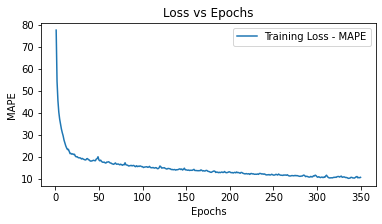

Min Training Loss = 10.259946823120117 at Epoch 336
17.181819860723735
h=1  ->  smape= 17.18
17.768542347566303
h=2  ->  smape= 17.77
19.44582566420087
h=3  ->  smape= 19.45
20.721222568156296
h=4  ->  smape= 20.72
20.17803571123496
h=5  ->  smape= 20.18
22.26064647200547
h=6  ->  smape= 22.26
20.702170009858182
h=7  ->  smape= 20.70
24.257540519705337
h=8  ->  smape= 24.26
23.24003539344627
h=9  ->  smape= 23.24
25.28659919528901
h=10 ->  smape= 25.29
24.937321708067287
h=11  ->  smape= 24.94
26.903130431007316
h=12  ->  smape= 26.90
26.818219942903422
h=13  ->  smape= 26.82
25.872344413068728
h=14  ->  smape= 25.87
rSq =['0.8708', '0.7995', '0.8052', '0.7798', '0.7727', '0.7273', '0.7754', '0.6762', '0.6484', '0.6053', '0.6638', '0.6206', '0.6144', '0.5631'] mape =['16.59', '18.94', '20.05', '19.87', '19.64', '22.80', '20.53', '22.60', '23.28', '25.69', '23.55', '24.43', '25.38', '24.23'] smape =['17.18', '17.77', '19.45', '20.72', '20.18', '22.26', '20.70', '24.26', '23.24', '25.29'

In [20]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(modelCNN, True, Xa, ya, -1, 10, 0, 350, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [31]:
#Model before tuning
amodelCNN=Sequential()
amodelCNN.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps_in, features)))
amodelCNN.add(MaxPooling1D(pool_size=2))
amodelCNN.add(Flatten())
amodelCNN.add(Dense(100,activation='relu'))
amodelCNN.add(Dense(50,activation='relu'))
amodelCNN.add(Dense(steps_out))
amodelCNN.compile(optimizer='adam',loss='mape')
amodelCNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 20, 64)            192       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               64100     
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_31 (Dense)             (None, 14)                714       
Total params: 70,056
Trainable params: 70,056
Non-trainable params: 0
__________________________________________________

m = 286, tr_size = 171, te_size = 115, kt = 115, h = 10
(115, 21, 1) (115, 14) (171, 21, 1) (171, 14)
we are in loop


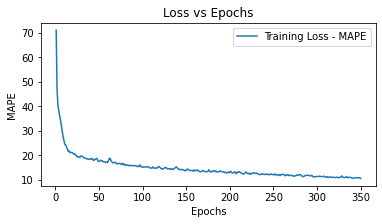

Min Training Loss = 10.629609107971191 at Epoch 350
17.18989596087262
h=1  ->  smape= 17.19
17.48505909222364
h=2  ->  smape= 17.49
19.682841229911542
h=3  ->  smape= 19.68
19.751525038470728
h=4  ->  smape= 19.75
18.428208105337042
h=5  ->  smape= 18.43
20.20509855818265
h=6  ->  smape= 20.21
20.816055286005682
h=7  ->  smape= 20.82
24.172172096463576
h=8  ->  smape= 24.17
21.968463236873745
h=9  ->  smape= 21.97
22.742256901108494
h=10 ->  smape= 22.74
24.27523471227596
h=11  ->  smape= 24.28
24.991659489771877
h=12  ->  smape= 24.99
27.327071678978704
h=13  ->  smape= 27.33
27.86387023273506
h=14  ->  smape= 27.86
rSq =['0.8777', '0.8307', '0.8200', '0.7885', '0.8155', '0.7797', '0.7462', '0.7177', '0.7219', '0.6764', '0.6708', '0.6193', '0.6441', '0.5936'] mape =['16.62', '18.37', '19.19', '20.19', '18.29', '20.64', '20.62', '22.86', '22.19', '21.70', '23.33', '24.25', '25.40', '25.10'] smape =['17.19', '17.49', '19.68', '19.75', '18.43', '20.21', '20.82', '24.17', '21.97', '22.74'

In [32]:
rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e = rollingValidate(amodelCNN, True, Xa, ya, -1, 10, 0, 350, 16, True, True, True)
print("rSq ="+str(rSq)+ " mape ="+str(mape) +" smape ="+ str(smape)+" mse ="+ str(mse) +" rmse ="+ str(rmse)+" sse ="+ str(sse)+ " sst ="+ str(sst))

In [12]:
def plotHistory(fit_history,ls="MAPE"):
    #Get training loss
    loss = fit_history.history['loss']
    # val_loss = fit_history.history['val_loss']

    # Create count of the number of epochs
    epoch_count = range(1, len(loss) + 1)

#     # Visualize loss history - Plotting Loss vs Number of Epochs during training
    plt.figure(num=0,figsize=(6,3))
    plt.plot(epoch_count, loss)
    # plt.plot(val_loss)
    plt.legend(['Training Loss - '+str(ls), 'Validation Loss - '+str(ls)])
    plt.xlabel('Epochs')
    plt.ylabel(ls)
    plt.title("Loss vs Epochs")
    plt.show()

#     print("_________________________________________________________________________________________")
    print("Min Training Loss = " + str(np.min(loss)) + " ",end='')
    print("at Epoch " + str(np.argmin(loss) + 1))
    # print("Min Validation Loss = " + str(np.min(val_loss)) + " ",end='')
    # print("at Epoch " + str(np.argmin(val_loss) + 1))
#     print("__________________________________________________________________________________________")

In [13]:
def eval(y,yp):
    # print(y)
    # print(yp)
    import math
    roundTo = 5
    m = y.shape[0]
    # print(m)
    e = np.array(y - yp)

    # print("m")
    # print(e)
    yt = np.array(y - y.mean())
    sse = e.dot(e)
    sst = yt.dot(yt)
    rSq = round((1 - ((sse)/(sst))),roundTo)
    mape = round(((np.absolute(e)/np.absolute(y)).sum())*100/m,roundTo)
    t = (np.absolute(e)/(np.absolute(y)+np.absolute(yp)))
    print(t.sum()*200/m)
    smape = round(((np.absolute(e)/(np.absolute(y)+np.absolute(yp))).sum())*200/m,roundTo)
    # smape  = 200 * (e.abs / (yy.abs + yp.abs)).sum / m
    mse = round((sse/m),roundTo)
    rmse = round(math.sqrt(mse),roundTo)
#     return(rSq,mape,mse,rmse,sse,sst)
    return(format(rSq,'.4f'),format(mape,'.2f'),format(smape,'.2f'),format(mse,'.2f'),format(rmse,'.2f'),format(sse,'.2f'),format(sst,'.2f'))

In [14]:
def rollingValidate(model, train, x, y, kt, h, callbk, nEpoch, nBatch, plot, p1, p2):
    TR_RATIO = 0.6
    m = y.shape[0]
    tr_size = int(m * TR_RATIO)
    te_size = int(m - tr_size)
    te = int(tr_size)
    if kt < 0: kt = te_size
    print("m = "+str(m)+", tr_size = "+str(tr_size)+", te_size = "+str(te_size)+", kt = "+str(kt)+", h = "+str(h))
    
    (x_e, y_e, x_r, y_r) = chopr (x, y, te, te_size, tr_size)
    print(x_e.shape, y_e.shape, x_r.shape, y_r.shape)
    # print(type(y_r))
    # print(y_r.index)
    
    # print(type(y_e))
    # print(y_e.index)
    #print(y_e.shape)
    #y_e = np.array(y_e)
    #print(y_e)
   # smapearr = [x for x in range(10,24)]
   # for h in range(1,15):
   #     yr =  y_r[h-1]
   #     inp = y_e[h-1].tolist()
   #     yrw = inp[:-h]
       
   #     for i in range(h):
   #         yrw.insert(i,inp[i])
   #     yrw = np.array(yrw)
   #     rSqr, maper, smaper, mser, rmser, sser, sstr = eval(y_e[h-1],yrw)
   #     smapearr[h-1] = smaper
#     x_r = x_r[1000:]
#     y_r = y_r[1000:]
#     print("Training shape"+str(x_r.shape))
#     print("Training shape"+str(y_r.shape))
#     print("Testing shape"+str(x_e.shape))
#     print("Testing shape"+str(y_e.shape))
    rt = 0
#     print("number of re-trainings required = "+str(int((te_size/kt)+1)))
    for i in range(y_e.shape[0]):
        if i%kt == 0:
            rt = rt + 1
            if i > 0:
                x_r, y_r = shift_rm((x_r,y_r),((x_e.iloc[i-kt:i], y_e.iloc[i-kt:i])))
            if train:
                if callbk==1:
                    callb = callbacks.EarlyStopping(monitor='loss', restore_best_weights=True, patience=20,verbose=1)
                else: callb = None
                print("we are in loop")
                fit_history = model.fit(x_r, y_r,validation_split=0.10,shuffle=True,epochs=nEpoch, \
                                        batch_size=nBatch,verbose=0, callbacks=callb) #callbacks=[tfa.callbacks.TQDMProgressBar(leave_epoch_progress=False,show_epoch_progress=False)]  workers=10, use_multiprocessing=True,
            if plot: plotHistory(fit_history)
#     print("\nOut-Sample Results")
#    rw = np.array([2.47,3.79,4.6,5.23,5.75,6.18,6.61,6.94,7.29,7.70]) #RW results - mape for 50% TR
#    rw = np.array([float(x) for x in smapearr]) #calculated using python
    beats = []
    
    prediction = model.predict(x_e,batch_size=100)
    rSq  = [x for x in range(14)]
    mse  = [x for x in range(14)]
    sse  = [x for x in range(14)]
    sst  = [x for x in range(14)]
    rmse = [x for x in range(14)]
    mape = [x for x in range(14)]
    smape = [x for x in range(14)]
    maxdif = 0
    maxdifh = 0

    for h in range(1,15):
        yf = prediction[:,h-1]
        rSq[h-1], mape[h-1], smape[h-1], mse[h-1], rmse[h-1], sse[h-1], sst[h-1] = eval(y_e[:,h-1],yf)
       # diff = (rw[h-1] - float(mape[h-1]))
        #if rw[h-1] >= float(mape[h-1]): beats.append(h)
        #if diff > maxdif:
        #    maxdif = diff
        #    maxdifh = h
        if p1:
            if h != 10:print("h="+str(h)+"  -> "+" smape= "+str(smape[h-1]))     #" sse = "+str(sse[h-1]) +
            else:print("h="+str(h)+" -> "+" smape= "+str(smape[h-1]))            #" sse = "+str(sse[h-1]) +
#             if h != 10: print("h="+str(h)+"  -> "+"rsq = "+str(rSq[h-1])+" mape = "+str(mape[h-1])+","+str(format(rw[h-1],'.2f'))+" mse = "+str(mse[h-1])+" rmse = "+str(rmse[h-1]) +" sst = "+str(sst[h-1])) #" sse = "+str(sse[h-1]) +
#             else: print("h="+str(h)+" -> "+"rsq = "+str(rSq[h-1])+" mape = "+str(mape[h-1])+","+str(format(rw[h-1],'.2f'))+" mse = "+str(mse[h-1])+" rmse = "+str(rmse[h-1]) +" sst = "+str(sst[h-1])) #" sse = "+str(sse[h-1]) +
#         print("h="+str(h)+" -> "+" mape = "+str(mape)+","+str(rw[h-1])+" rsq = "+str(rSq))
    #if p2: 
        #print("Beats RW at "+str(len(beats))+" values of h="+str(beats))
        #print("Max difference = "+str(maxdif)+" at horizon h="+str(maxdifh))
    return (rSq, mape, smape, mse, rmse, sse, sst, beats, prediction, y_e)

In [15]:
def chopr(x,y,te,te_size,tr_size):
    te2 = te + te_size
    tr = te - tr_size
#     print("te="+str(te))
#     print("te_size="+str(te_size))
#     print("tr_size="+str(tr_size))
    x_e = x[te:te2]
    y_e = y[te:te2]
    x_r = x[tr:te]
    y_r = y[tr:te]
    
#     print("test: x_e("+str(te)+" .. "+str(te2-1)+")")
#     print("test: y_e("+str(te)+" .. "+str(te2-1)+")")
#     print("train: x_r("+str(tr)+" .. "+str(te-1)+")")
#     print("train: y_r("+str(tr)+" .. "+str(te-1)+")")
    return(x_e, y_e, x_r, y_r)